<h1><center>Laboratorio 7: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>

### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Rafael Tapia
- Nombre de alumno 2: Daniel Vargas

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/rodusflitope/DataScienceLabs)

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.


### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Clasificación de pacientes con diabetes (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos)
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto)
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto)

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

In [2]:
# !pip install xgboost

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

* La base cuenta con 70.692 regisrros y 18 columnas. Encontramos que todas son variables numéricas y no tienen valores nulos. 

In [ ]:
display(df.describe(include='all'))

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


* La mayoria de variables son binarias (0 o 1). 
* Age está en escala de 1 a 13 que pueden ser rangos de edad al igual que GenHlth que tiene valores discretos de 1 a 5.
* BMI: promedio de 29.85, indicando sobrepeso general.
* MentHlth, PhysHlth son variables numéricas (salud mental y física) que están en el mismo rango. 
* La mayoría de personas tienen chequeo de colesterol, pues la media es 0.98, y al ser binaria, lleva a pensar eso. 

In [5]:
print("Valores nulos:")
print(df.isnull().sum())
print(df.dtypes.value_counts())

print("Distribución del target (Diabetes):")
print(df['Diabetes'].value_counts(normalize=True))

Valores nulos:
Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64
float64    18
Name: count, dtype: int64
Distribución del target (Diabetes):
Diabetes
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


La variable diabetes está balanceada perfectamente. 

In [6]:
# Correlación con el target
num_cols = df.select_dtypes(include=np.number).columns
corr = df[num_cols].corrwith(df['Diabetes']).sort_values(ascending=False)
print(corr)

Diabetes                1.000000
GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
Stroke                  0.125427
CholCheck               0.115382
MentHlth                0.087029
Smoker                  0.085999
Sex                     0.044413
Fruits                 -0.054077
Veggies                -0.079293
HvyAlcoholConsump      -0.094853
PhysActivity           -0.158666
dtype: float64


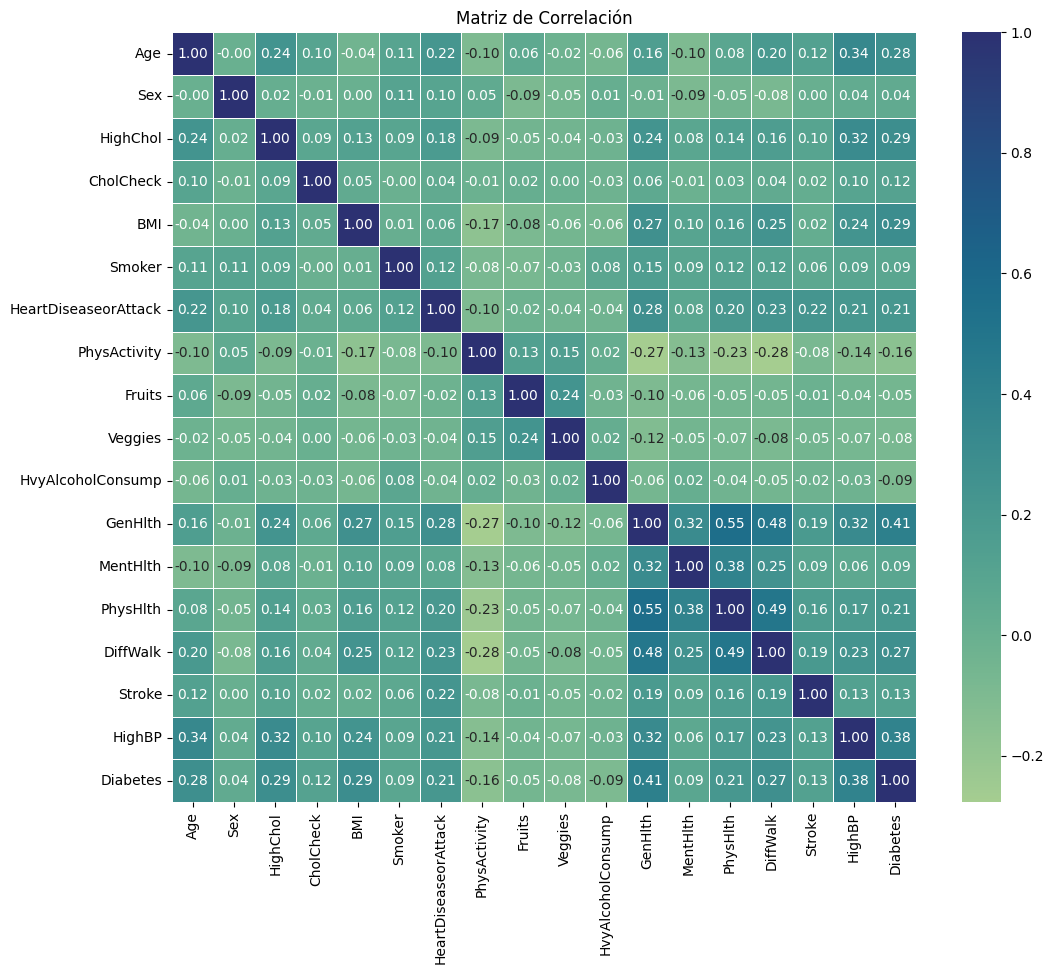

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='crest',  fmt='.2f', annot_kws={"size": 10}, linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

* GenHlth es la variable más correlacionada con "Diabetes" (0.41). Puede interpretarse que una mala percepción general de la salud está asociado con más probabilidad de tener diabetes.

* Enfermedades como hipertensión, colesterol alto, problemas del corazón, y dificultad para caminar también se correlacionan moderadamente con la diabetes.

* El índice de masa corporal (BMI) y la edad (Age) también son factores que influyen.

Se debe tener precaución con esto, pues correlación no implica causalidad. Sin embargo estos análisis pueden ayudar a entender la influencia de ciertas variables. 

C:\Users\danny\AppData\Local\Temp\ipykernel_20508\3425632422.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Variable", y="Valor", data=df_melt, palette="Blues")


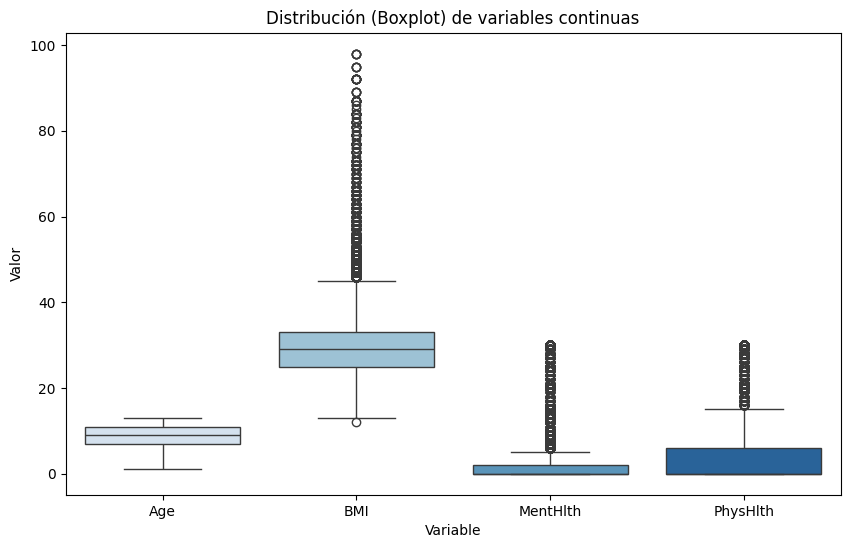

In [8]:
# Variables continuas
cont_vars = ["Age", "BMI", "MentHlth", "PhysHlth"]

plt.figure(figsize=(10,6))
df_melt = df.melt(value_vars=cont_vars, var_name="Variable", value_name="Valor")
sns.boxplot(x="Variable", y="Valor", data=df_melt, palette="Blues")
plt.title("Distribución (Boxplot) de variables continuas")
plt.show()

Distribuciones con outlieres, pero mas fuerte en indice de masa corporal. Salud mental y física presenta outliers pero el rango es mas pequeño que BMI.

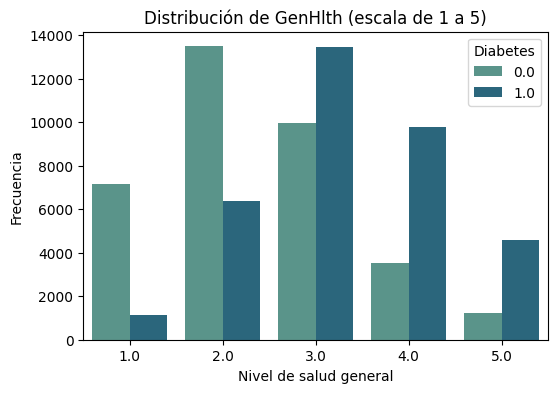

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='GenHlth', data=df, hue="Diabetes", palette='crest')
plt.title('Distribución de GenHlth (escala de 1 a 5)')
plt.xlabel('Nivel de salud general')
plt.ylabel('Frecuencia')
plt.show()

Se puede ver que a mayor nivel de percepcion sobre la salud general hay mayor probabilidad de diabetes, lo que lleva a pensar que un nivel 5 es un mal nivel general de salud, mientras que nivel 1 es mejor, ya que no hay tanta probabilidad de diabetees.

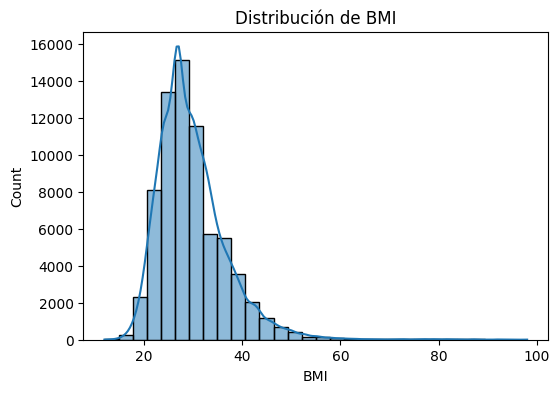

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='BMI', kde=True, bins=30)
plt.title('Distribución de BMI')
plt.xlabel('BMI')
plt.show()

El índice de masa corporal tiene una distribución sesgada a derecha con varios outliers. 

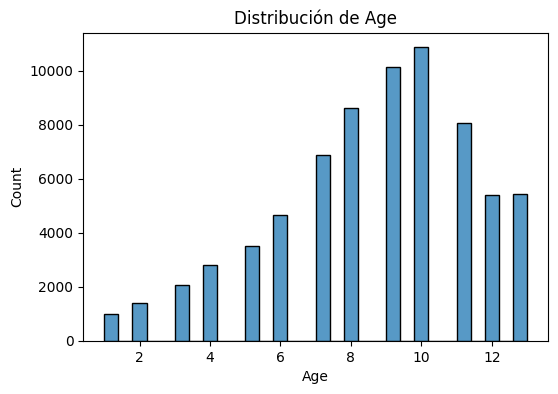

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Age', bins=30)
plt.title('Distribución de Age')
plt.xlabel('Age')
plt.show()

Se ve que la edad está agrupada en rangos específicos (grupos etareos). A continuación se observa en función de la variable target Diabetes para ver cómo se relacionan. 

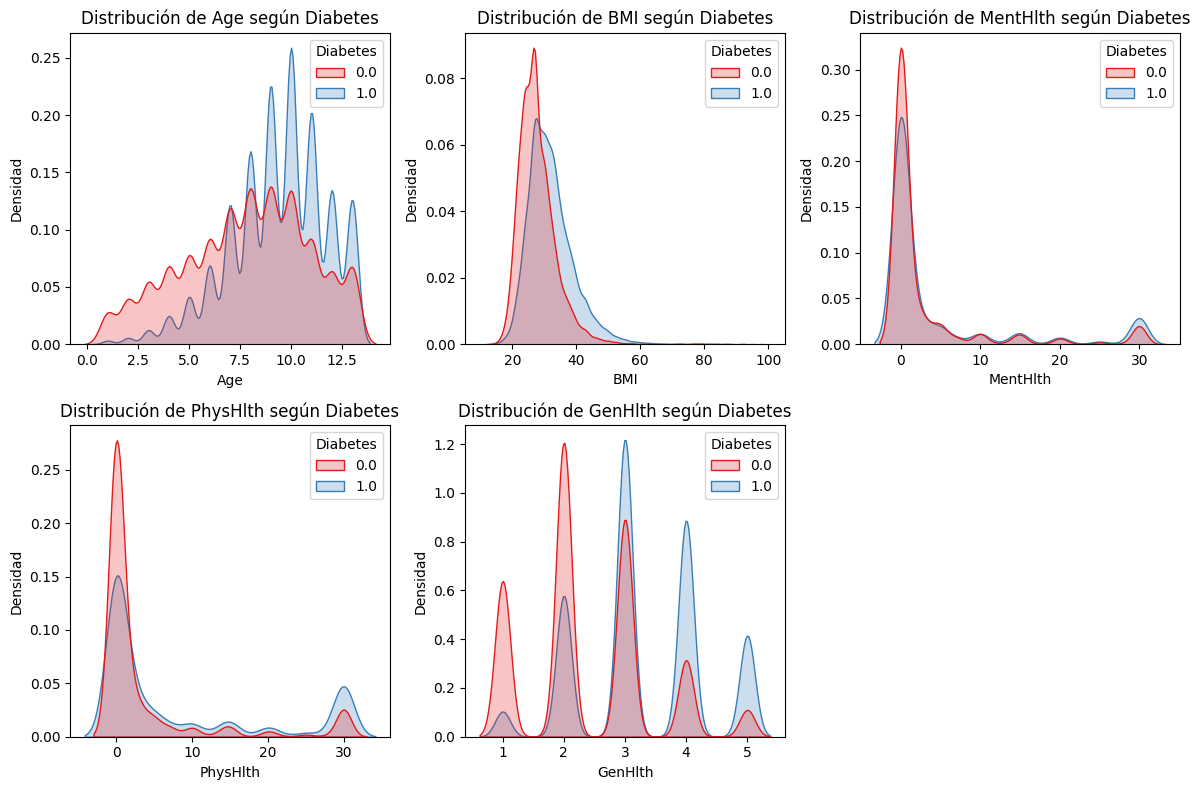

In [12]:
vars_interes = ["Age", "BMI", "MentHlth", "PhysHlth", "GenHlth"]

plt.figure(figsize=(12,8))
for i, var in enumerate(vars_interes, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(data=df, x=var, hue="Diabetes", fill=True, common_norm=False, palette="Set1")
    plt.title(f"Distribución de {var} según Diabetes")
    plt.xlabel(var)
    plt.ylabel("Densidad")
plt.tight_layout()
plt.show()

De acuerdo con lo anterior: 
* La distribución de BMI es sesgada, con outliers fuertes. Dado que StandarScaler es sensible a outliers, y MinMaxScaler lleva todo a [0, 1], comprimiendo outliers extremos (como los ≥ 70), se decide usar RobustScaler, pues usa la mediana y el rango intercuadrtil para reducir el efecto de los outliers (lo cual ayuda a que en PDP o SHAP los valores extremos no dominen la escala de los ejes). 
* Las variables que dominan por sus categorias y donde hay una clara relación con el target (como Age y GenHlth) se mantienen igual para poder interpretarlas. 
* MenHlth y PhysHlth tienen alta presencia de ceros, asi que StandarScaler o RobustScaler dejarían ceros como negativos, por lo que usar MinMaxScaler sería más apropiado.   

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

import xgboost as xgb

X = df.drop(columns=['Diabetes'])
y = df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/3, stratify=y, random_state=42
)


robust_cols = ['BMI']                       # outliers
minmax_cols  = ['MentHlth', 'PhysHlth']     # muchos ceros, 0..30
# Ordinales y binarias quedan en 'passthrough' (Age, GenHlth y dummies)

#  Preprocesamiento 
prep = ColumnTransformer(
    transformers=[
        ('robust', RobustScaler(), robust_cols),
        ('minmax', MinMaxScaler(), minmax_cols),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform='pandas')

#  Modelo 
xgb = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    n_jobs=-1
)

#  Pipeline 
pipe = Pipeline([
    ('prep', prep),
    ('clf', xgb)
])

#  Entrenamiento 
pipe.fit(X_train, y_train)

#  Evaluación 
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

feat_names = pipe.named_steps['prep'].get_feature_names_out()
print(feat_names)


              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73     11782
         1.0       0.73      0.79      0.76     11782

    accuracy                           0.75     23564
   macro avg       0.75      0.75      0.75     23564
weighted avg       0.75      0.75      0.75     23564

['BMI' 'MentHlth' 'PhysHlth' 'Age' 'Sex' 'HighChol' 'CholCheck' 'Smoker'
 'HeartDiseaseorAttack' 'PhysActivity' 'Fruits' 'Veggies'
 'HvyAlcoholConsump' 'GenHlth' 'DiffWalk' 'Stroke' 'HighBP']


**2. Rta/**
  *  ¿Es acaso un buen predictor de diabetes? 

  El accuracy global es 0.75, sin embargo esta metrica debe verse con cuidado pues no es confiable en caso de desbalance de clases. El modelo identifica casos positivos (recall = 0.79) sin perder demasiada precisión (0.73). En este contexto para la clase positiva (diabéticos), es deseable tener la menor cantidad de falsos negativos, es decir, clasificar incorrectamebte como ""No Diabéticos"" a pacientes enfermos, por lo que el Recall es la métrica que más interés puede tener. Así, el modelo logra un buen equilibrio entre sensibilidad y precisión, lo que lo hace un predictor útil para apoyo clínico, pero como todo, podría mejorarse. 


  * ¿Qué buscan explicar las métricas utilizadas?
  
  La precisión para la clase positiva indica que el 73 % de los  diagnosticados con Diabetes, por el modelo son correctos; El Recall (positiva)	indica de todos los verdaderos diabéticos, cuántos fueron detectados por el modelo, es decir detecta al 79 % de los casos reales.; el F1-score es la media armónica entre precision y recall, balancea ambas, por lo que 0.76 indica un buen equilibrio entre identificar casos y evitar falsos positivos; Accuracy indica la proporción total de aciertos, es decir, 0.75 indica que el modelo acierta 3  de cada 4 diagnósticos.
  
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?
  
  No necesariamente, ya que estas metricas indican qué tan bueno el modelo realiza predicciones, y esto lo puede hacer bien con todas o algunas variables, pero no indica el grado de importancia de cada variables seleccionada. Para decir que el modelo está tomando decisiones coherentes y que se puedan interpretar, hay que acudir a métodos agnósticos globales y locales como los que se verán mas adelante. 

## 3. Importancia de las features con XGBoost (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

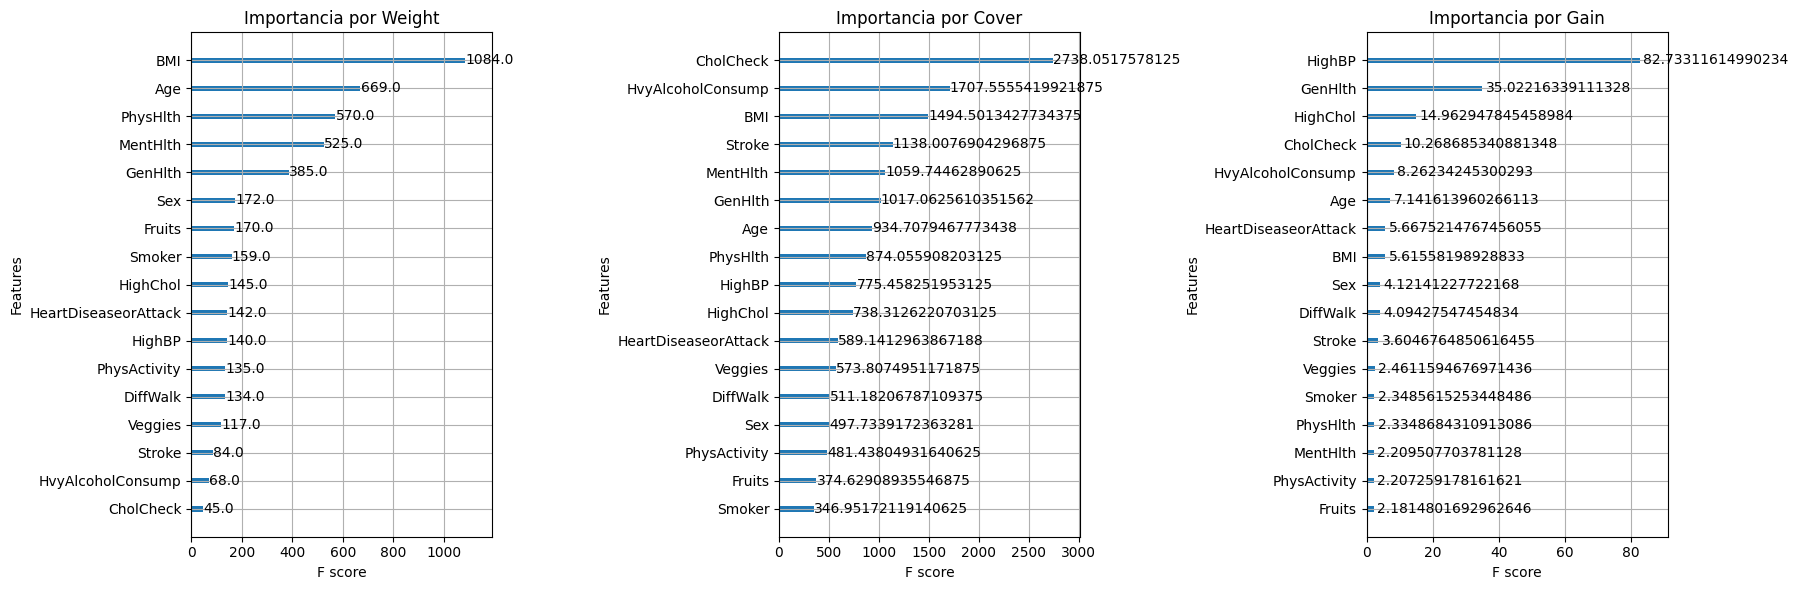

In [ ]:
from xgboost import plot_importance

prep = pipe.named_steps['prep']          # ColumnTransformer
xgb_model  = pipe.named_steps['clf']           # XGBClassifier

feat_names = prep.get_feature_names_out()

booster = xgb_model.get_booster()

booster.feature_names = list(feat_names) # Alinear nombres

# Gráfico de las tres importancias
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

plot_importance(xgb_model, importance_type='weight', ax=ax[0])
ax[0].set_title('Importancia por Weight')

plot_importance(xgb_model, importance_type='cover', ax=ax[1])
ax[1].set_title('Importancia por Cover')


plot_importance(xgb_model, importance_type='gain', ax=ax[2])
ax[2].set_title('Importancia por Gain')
plt.tight_layout()
plt.show()


**Rta/**

**¿Los resultados obtenidos con los diferentes métodos son compatibles? ¿a que se debe la igualdad o desigualdad?.**

En el tipo de importancia "weight", las variables BMI y Age son las más usadas. Esto significa que dichas variables son las que mas veces se usan  para dividir la data. En gain, HighBP y GenHlth tienen los valores mas altos, lo que significa que mejoran en promedio a la predicción, es como si aportaran la mayor ganancia de información. Con el tipo "Cover",  aparece CholCheck o HvyAlcoholConsump, lo que indica que cuando se usan, afectan a un gran número de observaciones, pues ahi recaen en promedio la mayoria.  

Segùn esto, cada método mide la importancia con efnoques distitnos. La desigualdad entre ellos se debe a que una variable puede ser usada muchas veces (alto weight) pero puede que aporte poca ganancia de infromación (bajo gain)  o incluso pueda  afectar a muchos datos sin mejorar mucho la predicción (alto cover).


**¿Las importancias son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?**
Las importancias obtenidas no son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles porque sólo tienen una visión global de la importancia de caracteristicas, pero no nos dice cómo afectan a las predicciones ni tampoco diferencia las interacciones entre variables. Estos metodos funcionan para saber qué variables son relevantes (por ejemplo, HighBP, BMI, GenHlth), pero tienen sus limitaciones. Por ejemplo, a) No se sabe la dirección del efecto, es decir, no se sabe si aumentar una variable aumenta el riesgo de diabetes o no; b) Hay sesgo hacia variables con muchos niveles, es decir, variables con mucho splits (como las continuas), tienden a tener mayor importancia en weight; c) No explican por que un paciente fue clasificado como Diabético. 

## 4. Métodos Agnósticos Globales (10 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)
3. Visualice los resultados de este método en un gráfico. (2 puntos)
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

**Rta/**


In [15]:
feat_names


array(['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Sex', 'HighChol',
       'CholCheck', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity',
       'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk',
       'Stroke', 'HighBP'], dtype=object)

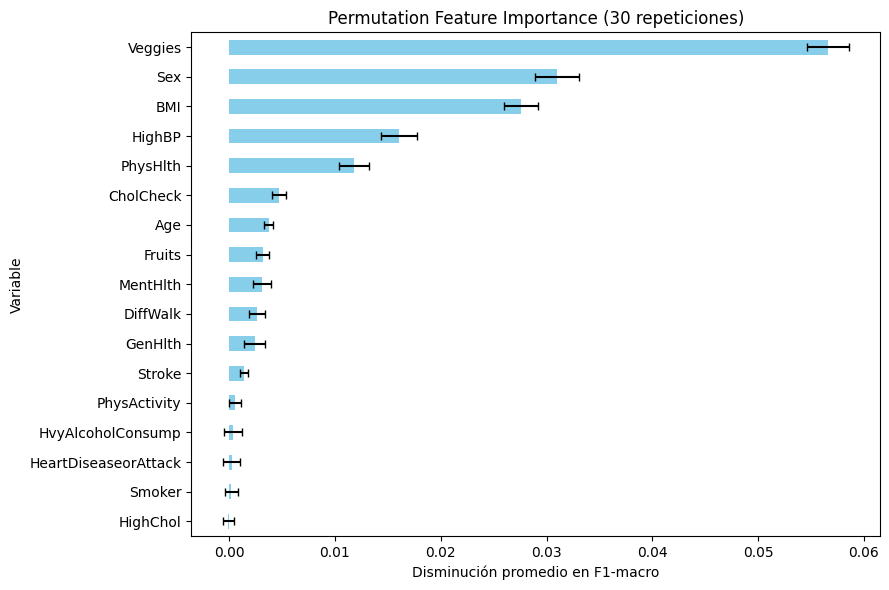

In [16]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(pipe, X_test,y_test, scoring='f1_macro', n_repeats=30, random_state=42,    n_jobs=-1)

#  Tabla de resultados 
imp_df = (pd.DataFrame(perm.importances.T, columns=feat_names)
    .agg(['mean', 'std']).T.sort_values('mean', ascending=True)
)

#  Visualización 
imp_df.plot(
    kind='barh', y='mean', xerr='std', capsize=3,
    figsize=(9,6), color='skyblue', legend=False)

plt.xlabel('Disminución promedio en F1-macro')
plt.ylabel('Variable')
plt.title('Permutation Feature Importance (30 repeticiones)')
plt.tight_layout()
plt.show()

In [17]:
imp_df = imp_df[::-1]
print((imp_df)) 

                          mean       std
Veggies               0.056586  0.001974
Sex                   0.030985  0.002054
BMI                   0.027585  0.001624
HighBP                0.016071  0.001712
PhysHlth              0.011799  0.001444
CholCheck             0.004667  0.000664
Age                   0.003737  0.000421
Fruits                0.003166  0.000595
MentHlth              0.003085  0.000865
DiffWalk              0.002622  0.000733
GenHlth               0.002405  0.000993
Stroke                0.001409  0.000409
PhysActivity          0.000528  0.000549
HvyAlcoholConsump     0.000356  0.000828
HeartDiseaseorAttack  0.000236  0.000783
Smoker                0.000203  0.000607
HighChol             -0.000096  0.000515


**Rta/**


**¿Cómo mide la importancia de las features su propuesta?**

El método de Permutation Feature Importance muestra cómo se afecta el rendimiento del modelo si se desordena (permuta) una variable. En cada repetición, se permuta aleatoriamente una columna del conjunto de datos y se mide cuánto disminuye la  métrica que se desea analizar. Si por ejemplo la métrica cae mucho (F1-score), es porque la varaiable era relevante para el modelo, si no cambia entonces la variable no aportaba informaciòn relevante. En este caso, la importancia se mide como la disminución promedio del F1-macro tras 30 permutaciones, y la desviación estándar representa qué tan estable es dicha medición. 


**¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido?**
Las variables con mayor impacto son Veggies, Sex, BMI, HighBP y PhysHlth. Tiene sentido ya que pro ejemplo Veggies parece estar relacionado a si la persona come o no  vegetales, lo cual es saludable y puede disminuir el riesgo de diabetes; en cuanto al sexo, puede que biologicamente hayan diferencias entre hombres y mujeres que afectan la probabilidad de tener diabetes; el índice de masa corporal alto es uno de los principales factores de riesgo; la presión arterial alta (HighBP) está relacionada con la resistencia a la insulina; PhysHlth refleja el estado de salud física, lo que tiene relación con la salud general del paciente, pues a mayor actividad fisica menos riesgo de diabetes. Aso que todas estas caracteristias son condiciones de salud y estilos de vida que influyen en el desarrollo de diabetes.


**¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?**

En el punto anterior se veía que variables como BMI, HighBP, GenHlth dominaban. Ahora, usando permutación, aparecen también variables como  Veggies y el Sex, que antes parecían menos relevantes. Asi las conclusiones cambian un poco, pues no solo hay variables medicas que afectan el target sino también variables de estilo de vida, y esto en conjunto permite tener una visión más completa del estado de un paciente. En este sentido, usar la permutación tiene sentido porque mide realmente la influencia de la variable en el rendimiento del modelo y no sólo cuántas veces fue usada dicha variable en los arboles o cuantas veces apareció para particionar los datos.


**Nombre y explique 3 ventajas y 3 desventajas del método implementado.**

Ventajas:
* Fácil  de interpretar.
* Comparable con diferentes modelos
* No necesita re-entrenar el modelo.

Desventajas
* Enlazado al error del modelo.
* Puede generar sesgos si hay correlaciones de features 
* Añadir una feature correlacionada puede disminuir la importancia de una feature asociada al separar la importancia en las dos features.

## 5. Métodos Agnósticos Locales (20 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/10-24-2024/oMCrLI.gif" width="400">
</p>

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)
2. ¿Qué representa cada número en su resultado? (1 punto)
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [18]:
# pip install shap

In [19]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [ ]:
import shap

Xte_trans = prep.transform(X_test) # hacemos todas las trasnformaciones definida en el pipe con prep

#  Calculamos los SHAP values 
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(Xte_trans)


In [21]:
shap_values

array([[-3.5910639e-01,  4.5114577e-02,  5.3925766e-04, ...,
        -6.3359343e-02, -1.4081961e-02,  4.9843606e-01],
       [ 2.2896267e-02, -2.1741351e-02,  1.6680945e-01, ...,
        -4.6477027e-02,  2.0250745e-01,  3.4764293e-01],
       [ 1.0941150e+00,  2.1085534e-02, -5.6774624e-02, ...,
         1.2113292e-02, -1.5104111e-02,  4.2437232e-01],
       ...,
       [-5.0660293e-04, -3.7987092e-01, -9.7701512e-02, ...,
        -2.4659157e-02, -3.2266587e-02,  4.3102539e-01],
       [-1.5885878e-01,  8.3815530e-02, -2.5724454e-02, ...,
        -3.9173987e-02, -2.1672046e-02,  4.7200072e-01],
       [ 6.6656090e-02,  8.2268395e-02, -3.3640858e-02, ...,
        -2.8405901e-02, -1.8069467e-02, -6.0703307e-01]], dtype=float32)

**Rta/**
Cada número representa el aporte que tiene una variable al resultado final de la predicción. Los valores negativos señalan aportes negativos para detectar el target de interés que en este caso es la diabetes. Por otro lado, los positivos señalan variables que entregan un aporte positivo a la detección de la diabetes. Un valor SHAP positivo indica que la variable aumenta la probabilidad de tener diabetes, y si es negativo, disminuye. 

### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)

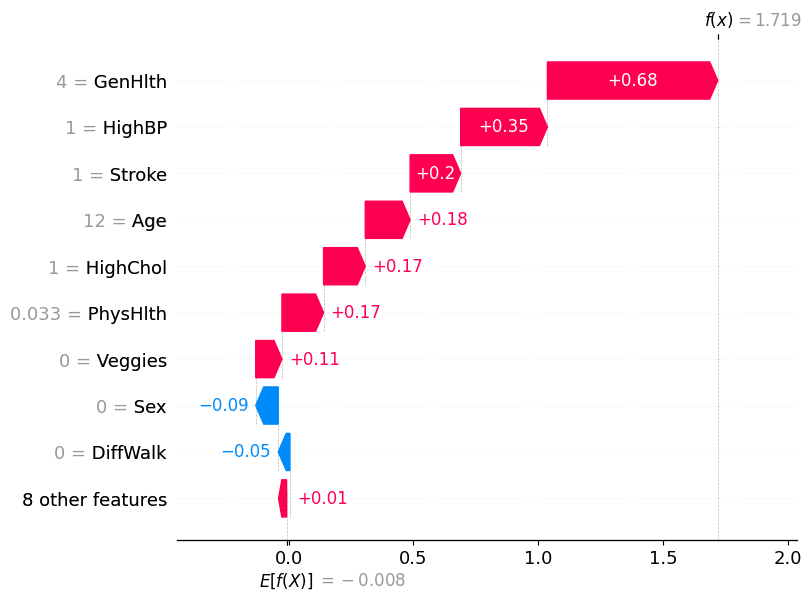

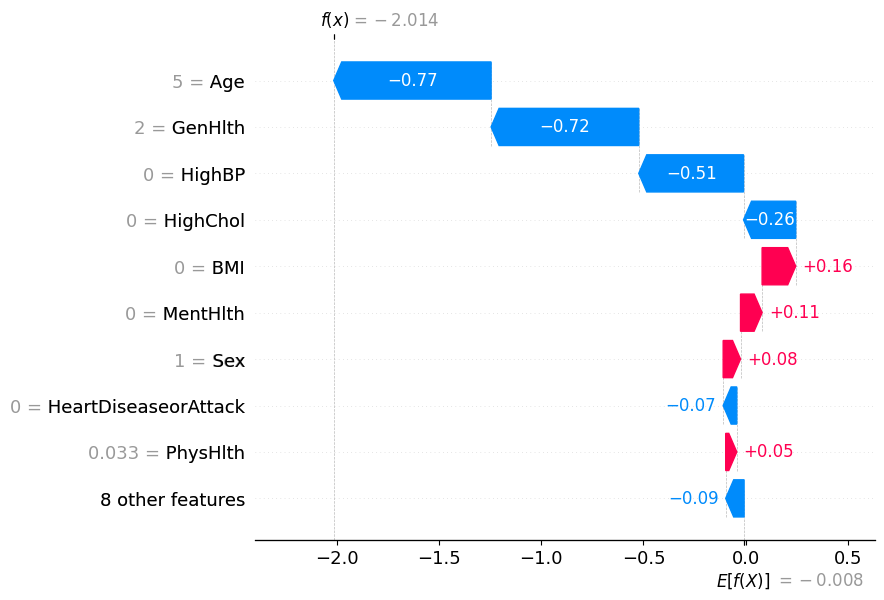

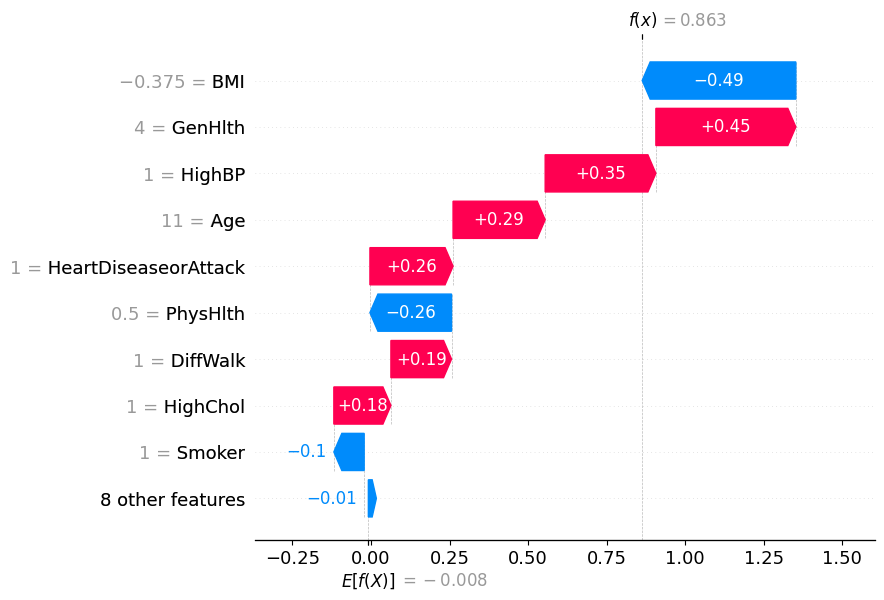

[None, None, None]

In [ ]:
indices = [1, 9, 150]

#  Gráficos tipo waterfall para cada paciente
# Nota: shap.plots.waterfall muestra cómo cada variable empuja la predicción final.
list(map(lambda i: shap.plots.waterfall(
    shap.Explanation(values=shap_values[i],
                     base_values=explainer.expected_value,
                     data=Xte_trans.iloc[i],
                     feature_names=feat_names)),
         indices))

**Rta/**

5.2..2.1) Las variables que afectan de manera positiva/negativa a la probabilidad de poseer diabetes son:

Variables que afectan positivamente:

* GenHlth tiene un gran impacto, tiene valores altos (como 4 o 5), ya que representa una mala percepción de salud.

* HighBP también aparece en casi todos los casos, lo que coincide con que la presión alta está muy asociada a la diabetes.

* Age y HighChol tienden contribuyen en que la predicción se vaya a la clase “diabetes”.

En algunos casos, Stroke o HeartDiseaseorAttack = 1 también aumentan riesgo.

* Tener Sex = 0 (en este caso parece corresponder a mujer) suele disminuir la probabilidad de diabetes.

* Veggies = 0 o PhysHlth bajo (pocos días con mala salud física) también reducen el riesgo.

5.2.2.2) ¿Existe algún patrón común entre las instancias analizadas? 

Sí, hay algunos patrones, como por ejemplo en todas las instancias aparece GenHlth y HighBP como variables en comun. Personas con edades altas, hipertensión y colesterol alto tendrían mayor probabilidad de diabetes.Y las que tienen variables relacionadas al bienestar también influyen, aunque con efectos distintos según el paciente.

5.2.2.3)  ¿Es posible generalizar estas conclusiones a todo el dataset? 

Los SHAP values dan explicaciones locales, es decir, muestran cómo se comporta el modelo para casos individuales. Lo que observamos, como el efecto positivo de HighBP o GenHlth, son coherentes y se repiten, pero no podría asegurarse que sean iguales para todos. 


### 5.3 Aporte global (4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

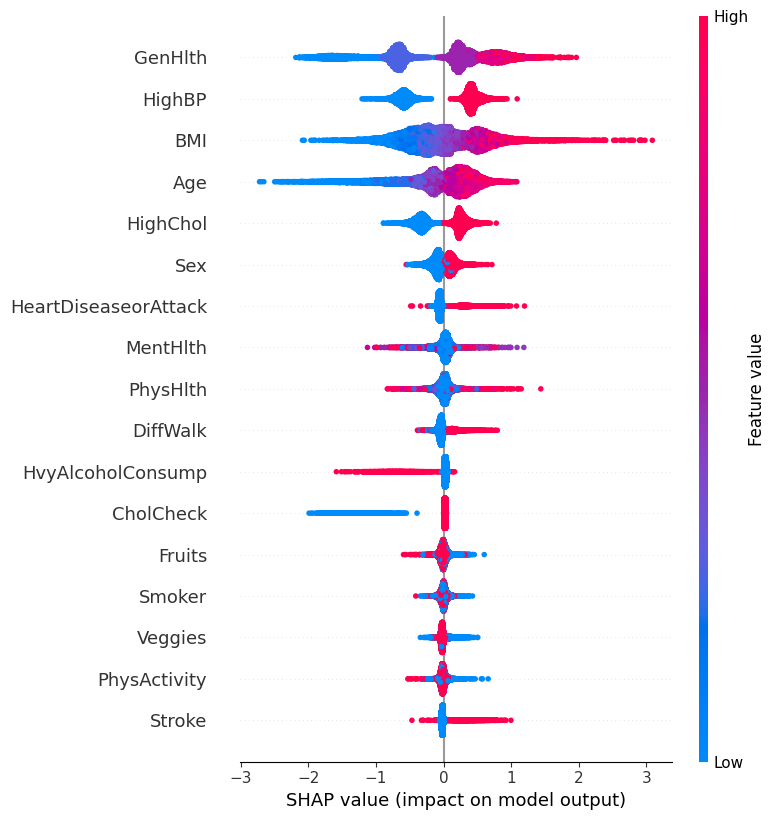

In [23]:
#  Visualización general (summary plot) 
shap.summary_plot(shap_values, Xte_trans, feature_names=feat_names)

**Rta/**

GenHlth, HighBP, BMI,  Age y HighChol son las características que más influyen (están más arriba en el gráfico) en predecir la diabetes; por otro lado, Stroke, PhysActivity, y Veggies influyen menos. El valor SHAP positivo (hacia la derecha) indica que la característica hace que aumente la predicción hacia clase positiva. En CholCheck, por ejemplo, valores bajos (azul) tienden a tener un valor SHAP negativo, lo que podría indicar que no hacerse un chequeo de colesterol disminuye la predicción del modelo. HighBP, cuando está presente (valor alto, rojo) aumenta la probabilidad de tener diabetes. 
A diferencia del análisis local, donde puede haber efectos distintos por paciente, el gráfico global resume y nos dice cómo se comporta el modelo en todo el conjunto de datos y qué variables son mejores a nivel global.

### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [ ]:
Xtr_df = prep.transform(X_train)            
Xte_df = prep.transform(X_test)             

y_proba = pipe.predict_proba(X_test)[:, 1]

# Explainer y valores SHAP en formato Explanation
explainer = shap.Explainer(xgb_model, Xtr_df)    # ya habiamos definido xgbmodel 
sv = explainer(Xte_df)                      # ojo: sv es un shap.Explanation

# Top 5 por valor abs de shap promedio de todo
imp_global = np.abs(sv.values).mean(axis=0)
top5_idx = np.argsort(imp_global)[-5:][::-1]
top5_features = np.array(feat_names)[top5_idx]


 99%|===================| 23412/23564 [01:36<00:00]        

In [32]:
print(imp_global)
print(top5_features)
print(top5_idx)

[0.45891737 0.09719079 0.08611447 0.3906522  0.11388027 0.31409872
 0.08102003 0.03970486 0.13632763 0.03778865 0.03925694 0.0398012
 0.06549254 0.58008345 0.07346775 0.0350683  0.36577494]
['GenHlth' 'BMI' 'Age' 'HighBP' 'HighChol']
[13  0  3 16  5]


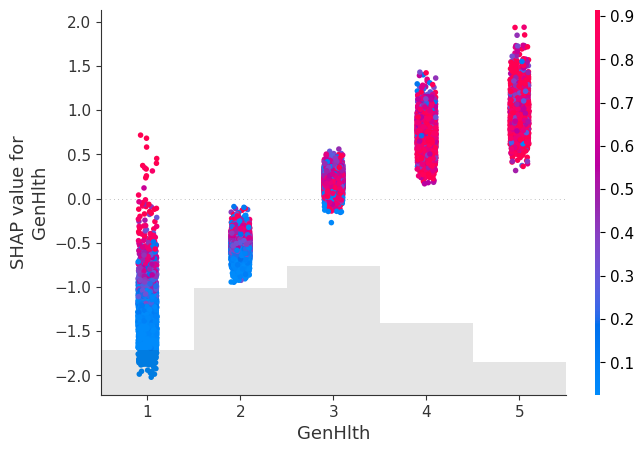

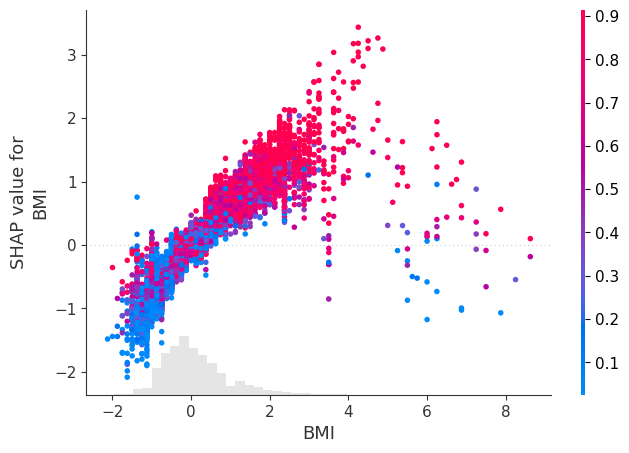

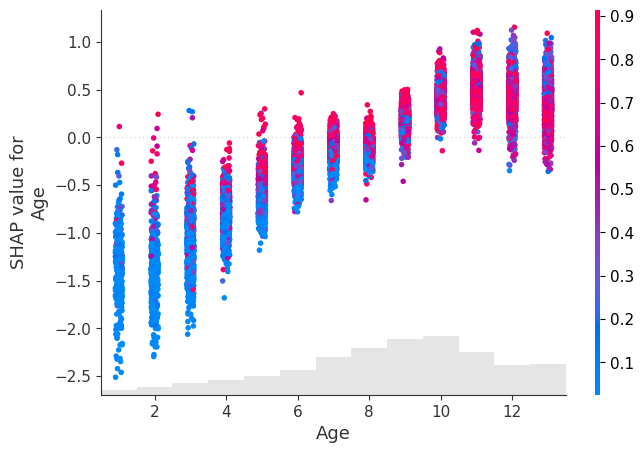

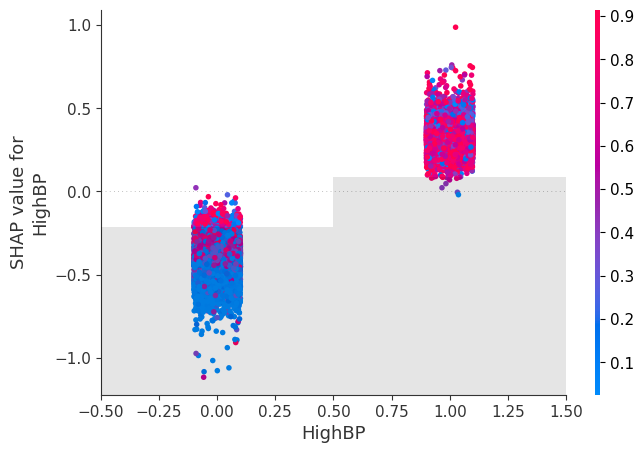

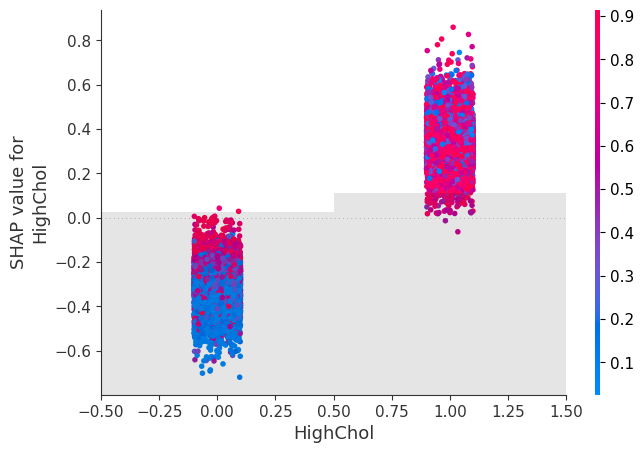

In [45]:
_ = list(map(lambda i: ( shap.plots.scatter(sv[:,i], color=y_proba, show=True),
                         plt.show()), top5_idx ))

De acuerdo con lo que se observa en los scatterplot, parece que el modelo se comporta como se esperaría. En GenHlth, se ve que cuando la salud no es buena (valores altos) hay un aumento del riesgo de tener diabetes. En BMI, los valores altos generan mayores valores SHAP, lo cual tiene sentido, pues el sobrepeso influye en la diabetes. Con Age, se observa una relación creciente, pues para rangos etarios mayores (edades altas) se corre un riesgo más alto de tener diabetes. En cuanto a HighBP y HighChol, ambos presentan valores positivos cuando son iguales a 1, lo que significa que presión o colesterol alto hacen que la probabilidad estimada de diabetes aumente. En general, el modelo aprendió patrones y relaciones que están alineados con los factores de riesgo que hacen que una persona pueda tener (o no) diabetes. 

### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

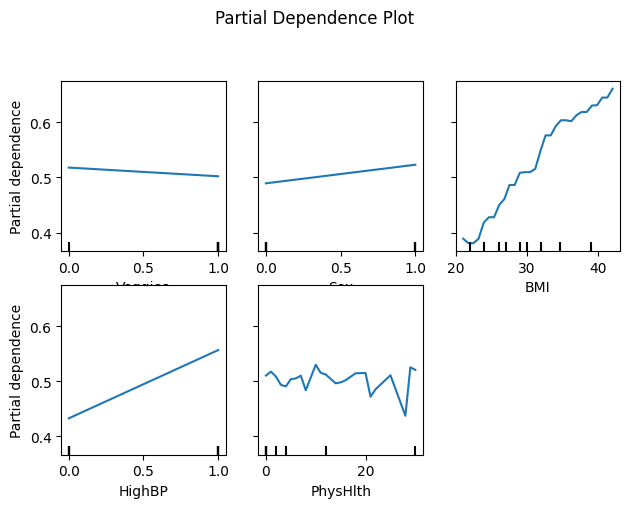

In [46]:
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

top5 = imp_df.head(5).index.tolist()

# Submuestra de 1.000 observaciones (mantener datos original para que PDP sepa los nombres)
X_sample = X_test.sample(n=min(1000, len(X_test)), random_state=42)

# PDP 
disp = PartialDependenceDisplay.from_estimator(
    estimator=pipe,
    X=X_sample,
    features=top5,          # nombres de columnas
    kind='average',
    grid_resolution=30,
    n_jobs=-1
)
disp.figure_.suptitle("Partial Dependence Plot", y=1.05)
plt.tight_layout()  
plt.show()


In [47]:
top5

['Veggies', 'Sex', 'BMI', 'HighBP', 'PhysHlth']

* Veggies: el grafico es casi plano y con un poco de pendiente negativa, lo que indica que comer vegetales influye poco en la salida promedio del modelo. Sin embargo, se puede ver que comer más vegetales ayuda a reducir un poco la probabilidad promedio de diabetes, lo cual hace sentido.

* Sex: también muestra un cambio mínimo pues hay una leve subida en la probabilidad promedio para uno de los sexos (quizas hombres), pero la diferencia no es muy marcada. Esto sugiere que el sexo por sí solo no es un factor decisivo, aunque podría si se combina o interactua con variables como la edad o presión arterial.

* BMI: se ve que es creciente. A medida que aumenta el índice aumenta la  probabilidad de diabetes.

* HighBP: el gráfico muestra una diferencia clara entre 0 y 1. Los que tienen hipertensión (HighBP = 1) presentan una mayor probabilidad de diabetes.

* PhysHlth: se ve algo irregular, pero parece que trata de crecer, lo cual tendría sentido ya que mala salud física se relacionaróa con la probabilidad de diabetes.

En general, sí pueden generalizarse como tendencias globales, ya que los plots muestran como se afecta la salida del modelo con una buen tamaño de muestra. Sin embargo, es importante tener en cuenta que PDP muestra promedios, por lo que no es muy bueno para diferenciar de forma individual ni hallar interacciones entre variables. Asi que aunque las conclusiones son a nivel general, el análisis de SHAP es necesario para analizar de forma individual.

## 6. Sistema de Reglas! (10 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo.
En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le será útil extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`.

In [48]:
# pip install alibi

In [49]:
from alibi.explainers import AnchorTabular

In [50]:
# Datos transformados 
Xtr = Xtr_df.to_numpy()                 
Xte = Xte_df.to_numpy()

# Función de predicción para Anchor 
predict_fn = lambda x: xgb_model.predict(x)

explainer = AnchorTabular(predict_fn, feature_names=list(feat_names))
explainer.fit(Xtr, disc_perc=(25, 50, 75), seed=42)

# Indices a explicar (ajustados por tamaño por si acaso)
idxs = np.array([1000, 3001, 5751])
idxs = np.clip(idxs, 0, Xte.shape[0] - 1) 

def _explain_one(i):
    xi = Xte[i].reshape(1, -1)     # Anchor requiere (1, n_features)
    exp = explainer.explain(xi)
    # Nota: precision y coverage son estimaciones basadas en muestreo del algoritmo
    return {
        "idx": int(i),
        "anchor_rule": " AND ".join(exp.anchor),
        "precision_anchor": float(exp.precision),
        "coverage_anchor": float(exp.coverage),
    }


results = list(map(_explain_one, idxs))

X_all = np.vstack([Xtr, Xte])
res_df = pd.DataFrame(results)
res_df["poblacion_explicable_aprox"] = (res_df["coverage_anchor"] * X_all.shape[0]).round().astype(int)
res_df

,idx,anchor_rule,precision_anchor,coverage_anchor,poblacion_explicable_aprox
0,1000,GenHlth > 2.00 AND DiffWalk > 0.00 AND BMI > -...,0.978903,0.0980,6928
1,3001,GenHlth > 2.00 AND HighBP > 0.00 AND Age > 9.0...,0.986431,0.1645,11629
2,5751,GenHlth > 3.00 AND HeartDiseaseorAttack > 0.00,0.982249,0.0835,5903


En conjunto, las tres reglas permiten explicar aproximadamente el 34 % del total de los datos, considerando que algunas pueden solaparse. Cada regla cubre entre un 8 % y un 17 % de la base, lo que lleva a pensar que dichas reglas representan grupos pacientes con caracteristicas parecidas dentro del total. Además. las reglas presentan precisiones mayores el 95%, lo que indica que el modelo es consistente al tomar decisiones para las observaciones que cumplen estas condiciones. En otras palabras, cuando se da una combinación de mala salud general (GenHlth mayor que 2 o 3), hipertensión (HighBP > 0), edad avanzada (Age > 9) o sobrepeso (BMI > 0), el modelo casi siempre predice la misma clase.

En los tres casos aparece GenHlth como factor principal, lo que muestra que el aumento de la percepcion mala de salud aumenta la probabilidad de diabetes. HighBP (presión arterial alta) y Age (edad avanzada) también aparecen en dos reglas, lo cual tiene sentido debido a que son factores de riesgo conocidos. Para la observación 5751, la edad se camvbia por BMI, indicando que el sobrepeso cumple un papel similar en la predicción. DiffWalk (dificultad para caminar) aparece solo en la primera regla, lo que también tiene sentido, pues esta relacionado con complicaciones en la salud. 


Estas reglas no solo muestran casos puntuales, sino que también dejan ver patrones globales, pues el modelo se apoya fuertemente de variables de salud general y cardiovascular. La mala salud, hipertensión, edad alta y sobrepeso explican una proporción significativa de las predicciones del modelo. Las reglas son simples pero tienen una gran influencia, pues resumen de alguna manera el comportamiento del modelo con alta precisión.

# Retrospectiva... (10 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

Con base en los métodos aplicados, para la tarea de clasificación, los metodos agnósticos globales como el de importancia por permutacion y PDP entregan mejores conclusiones porque ayudan a entender de forma general cómo las variables afectan la probabilidad de diabetes y ayudan a verificar que dichas variables tienen sentido desde el punto de vista médico, es decir, que variables como salud general, BMI, presión arterial son factores importantes en la salud y por lo tanto con efectos en el target.  Por otro lado, para el caso que se está estudiando, donde el doctor Simi requiere un fuerte enfoque de interpretabilidad, los métodos locales como SHAP y reglas de anclaje (Anchor) ayudan a justificar la clasificación de cierto perfil de paciente. Así, la explicación puede ser dada con reglas simples y que son fáciles de entender, lo cual es la idea del doctor. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>